In [1]:
import os, sys
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib_venn import venn3
import subprocess
import seaborn as sns

In [4]:
# contains all patients
DATScan = pd.read_csv("../Imaging/DATScan_Analysis.csv")

,PATNO,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L
0,3250,2.31,2.63,1.77,1.92
1,3204,3.66,3.02,1.36,1.67
2,3555,2.19,2.11,1.02,1.09
3,3403,1.64,1.19,0.65,0.43
4,3554,3.00,3.19,1.94,2.09
...,...,...,...,...,...
2271,57813,1.84,1.44,0.71,0.49
2272,59507,1.26,1.09,0.20,0.43
2273,70188,1.87,1.52,0.86,0.92
2274,71809,1.24,0.99,0.34,0.27


In [7]:
# our patients
patids = pd.read_csv("Data/QC/IDs_White_qc.txt",header=None,sep=" ")
patids

,0,1
0,3001,3001
1,3002,3002
2,3004,3004
3,3006,3006
4,3008,3008
...,...,...
561,4125,4125
562,4126,4126
563,4127,4127
564,4136,4136


In [84]:
patids = patids[0].tolist()

AttributeError: 'int' object has no attribute 'tolist'

In [13]:
DATScan = DATScan.sort_values(["PATNO","SCAN_DATE"])
DATScan

,PATNO,EVENT_ID,SCAN_DATE,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L
51,3000,SC,2011-01-20,2.99,3.43,2.94,2.63
1280,3001,U01,2011-06-23,2.00,1.92,0.80,0.65
398,3001,V04,2012-04-06,1.56,1.12,0.62,0.48
874,3001,V06,2013-05-03,1.68,1.26,0.38,0.42
1461,3001,U02,2014-04-25,1.53,0.65,0.37,0.50
...,...,...,...,...,...,...,...
2145,75484,SC,2018-11-09,1.35,1.24,0.49,0.40
2146,75505,SC,2019-02-12,1.90,1.66,0.72,0.55
2147,75524,SC,2018-11-30,1.36,1.76,0.51,0.80
2174,75537,SC,2018-10-17,1.46,1.03,0.72,0.42


In [15]:
DATScan = DATScan.groupby('PATNO').first().reset_index()
DATScan

,PATNO,EVENT_ID,SCAN_DATE,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L
0,3000,SC,2011-01-20,2.99,3.43,2.94,2.63
1,3001,U01,2011-06-23,2.00,1.92,0.80,0.65
2,3002,U01,2011-06-28,2.92,3.72,1.01,1.78
3,3003,U01,2011-08-24,3.63,2.54,1.11,0.68
4,3004,U01,2011-08-24,5.09,5.30,3.54,2.97
...,...,...,...,...,...,...,...
990,75484,SC,2018-11-09,1.35,1.24,0.49,0.40
991,75505,SC,2019-02-12,1.90,1.66,0.72,0.55
992,75524,SC,2018-11-30,1.36,1.76,0.51,0.80
993,75537,SC,2018-10-17,1.46,1.03,0.72,0.42


In [16]:
images = DATScan.iloc[:,np.r_[0,3:7]]
images

,PATNO,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L
0,3000,2.99,3.43,2.94,2.63
1,3001,2.00,1.92,0.80,0.65
2,3002,2.92,3.72,1.01,1.78
3,3003,3.63,2.54,1.11,0.68
4,3004,5.09,5.30,3.54,2.97
...,...,...,...,...,...
990,75484,1.35,1.24,0.49,0.40
991,75505,1.90,1.66,0.72,0.55
992,75524,1.36,1.76,0.51,0.80
993,75537,1.46,1.03,0.72,0.42


In [17]:
datscanPat = images[images["PATNO"].isin(patids)]
datscanPat = datscanPat.sort_values("PATNO")
datscanPat

,PATNO,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L
1,3001,2.00,1.92,0.80,0.65
2,3002,2.92,3.72,1.01,1.78
4,3004,5.09,5.30,3.54,2.97
5,3006,2.28,2.12,0.76,0.15
6,3008,3.99,3.46,2.07,2.12
...,...,...,...,...,...
731,4125,2.03,2.47,0.88,1.49
732,4126,1.54,1.88,0.63,0.40
733,4127,2.60,2.34,2.54,2.27
735,4136,0.68,0.57,0.36,0.27


In [18]:
ppmi_info = pd.read_csv('../PPMI_data/Info files/Screening___Demographics.csv')
ppmi_info

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,SIGNCNST,CONSNTDT,APPRDX,CURRENT_APPRDX,P3GRP,...,PRJENRDT,REFERRAL,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,224392801,V,3400,CONSENT,SCREEN,1.0,06/2010,1.0,1.0,NaN,...,07/2010,60.0,NaN,NaN,NaN,NaN,06/2010,2010-12-17 10:58:57.0,NaN,07/2010
1,224394301,V,3401,CONSENT,SCREEN,1.0,06/2010,2.0,2.0,NaN,...,07/2010,1.0,NaN,NaN,NaN,NaN,06/2010,2010-07-20 08:09:56.0,NaN,07/2010
2,224398401,V,3402,CONSENT,SCREEN,1.0,06/2010,3.0,3.0,NaN,...,10/2011,1.0,NaN,NaN,NaN,NaN,06/2010,2011-09-27 12:12:25.0,NaN,07/2010
3,224400201,V,3403,CONSENT,SCREEN,1.0,06/2010,1.0,1.0,NaN,...,07/2010,1.0,NaN,NaN,NaN,NaN,06/2010,2010-07-20 08:35:45.0,NaN,07/2010
4,224718101,V,3404,CONSENT,SCREEN,1.0,06/2010,2.0,2.0,NaN,...,07/2010,1.0,NaN,NaN,NaN,NaN,06/2010,2010-07-20 09:00:48.0,NaN,07/2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,756290301,V,5012,SC,SCREEN,1.0,09/2019,9.0,9.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,09/2019,2019-09-27 08:31:52.0,NaN,09/2019
2249,756314501,V,5013,SC,SCREEN,1.0,09/2019,9.0,9.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,09/2019,2019-09-27 10:51:18.0,NaN,09/2019
2250,760684001,V,5014,SC,SCREEN,NaN,NaN,9.0,9.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,11/2019,2019-11-19 11:26:48.0,NaN,11/2019
2251,760745601,V,5015,SC,SCREEN,NaN,NaN,9.0,9.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,11/2019,2019-11-20 09:20:16.0,NaN,11/2019


In [21]:
images_info = datscanPat.merge(ppmi_info, on=['PATNO'])
images_info

,PATNO,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L,REC_ID,F_STATUS,EVENT_ID,PAG_NAME,SIGNCNST,...,PRJENRDT,REFERRAL,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,3001,2.00,1.92,0.80,0.65,274783501,V,CONSENT,SCREEN,1.0,...,03/2011,60.0,NaN,NaN,NaN,NaN,02/2011,2011-02-10 10:43:30.0,NaN,03/2011
1,3002,2.92,3.72,1.01,1.78,278717701,V,CONSENT,SCREEN,1.0,...,03/2011,1.0,NaN,NaN,NaN,NaN,03/2011,2011-03-04 11:04:58.0,NaN,03/2011
2,3004,5.09,5.30,3.54,2.97,281159801,V,CONSENT,SCREEN,1.0,...,04/2011,99.0,NaN,NaN,NaN,NaN,03/2011,2011-03-30 11:43:13.0,NaN,03/2011
3,3006,2.28,2.12,0.76,0.15,283722401,V,CONSENT,SCREEN,1.0,...,04/2011,1.0,NaN,NaN,NaN,NaN,03/2011,2011-03-31 07:21:03.0,NaN,03/2011
4,3008,3.99,3.46,2.07,2.12,289807201,V,CONSENT,SCREEN,1.0,...,06/2011,4.0,NaN,NaN,NaN,NaN,05/2011,2013-10-31 11:28:09.0,NaN,05/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,4125,2.03,2.47,0.88,1.49,387339801,V,CONSENT,SCREEN,1.0,...,03/2013,1.0,NaN,NaN,NaN,NaN,02/2013,2013-12-10 12:36:00.0,NaN,05/2013
562,4126,1.54,1.88,0.63,0.40,388354501,V,CONSENT,SCREEN,1.0,...,03/2013,1.0,NaN,NaN,NaN,NaN,03/2013,2013-03-27 08:35:42.0,NaN,03/2013
563,4127,2.60,2.34,2.54,2.27,391193701,V,CONSENT,SCREEN,1.0,...,04/2013,1.0,NaN,NaN,NaN,NaN,03/2013,2013-05-28 06:37:21.0,NaN,03/2013
564,4136,0.68,0.57,0.36,0.27,388121201,V,CONSENT,SCREEN,1.0,...,02/2013,99.0,NaN,NaN,NaN,NaN,03/2013,2013-03-06 07:09:02.0,NaN,06/2013


In [25]:
# convert int to group category for each patients
status = list()
for i in range(len(images_info)):
    s = int(images_info.loc[i,"APPRDX"])
    if s == 1:
        status.append("PD")
    elif s == 2:
        status.append("HC")
    elif s == 3:
        status.append("SWEDD")
    else:
        pat = images_info.loc[i,"PATNO"]
        print(pat)
        raise Exception 

images_info["APPRDX2"] = status
images_info

,PATNO,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L,REC_ID,F_STATUS,EVENT_ID,PAG_NAME,SIGNCNST,...,REFERRAL,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,APPRDX2
0,3001,2.00,1.92,0.80,0.65,274783501,V,CONSENT,SCREEN,1.0,...,60.0,NaN,NaN,NaN,NaN,02/2011,2011-02-10 10:43:30.0,NaN,03/2011,PD
1,3002,2.92,3.72,1.01,1.78,278717701,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2011,2011-03-04 11:04:58.0,NaN,03/2011,PD
2,3004,5.09,5.30,3.54,2.97,281159801,V,CONSENT,SCREEN,1.0,...,99.0,NaN,NaN,NaN,NaN,03/2011,2011-03-30 11:43:13.0,NaN,03/2011,HC
3,3006,2.28,2.12,0.76,0.15,283722401,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2011,2011-03-31 07:21:03.0,NaN,03/2011,PD
4,3008,3.99,3.46,2.07,2.12,289807201,V,CONSENT,SCREEN,1.0,...,4.0,NaN,NaN,NaN,NaN,05/2011,2013-10-31 11:28:09.0,NaN,05/2011,HC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,4125,2.03,2.47,0.88,1.49,387339801,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,02/2013,2013-12-10 12:36:00.0,NaN,05/2013,PD
562,4126,1.54,1.88,0.63,0.40,388354501,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2013,2013-03-27 08:35:42.0,NaN,03/2013,PD
563,4127,2.60,2.34,2.54,2.27,391193701,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2013,2013-05-28 06:37:21.0,NaN,03/2013,SWEDD
564,4136,0.68,0.57,0.36,0.27,388121201,V,CONSENT,SCREEN,1.0,...,99.0,NaN,NaN,NaN,NaN,03/2013,2013-03-06 07:09:02.0,NaN,06/2013,PD


### PLOT CAUDATE and PUTAMEN without normalizing putamen (without using ranknorm funcion in r)

Text(0, 0.5, 'PUTAMEN_R')

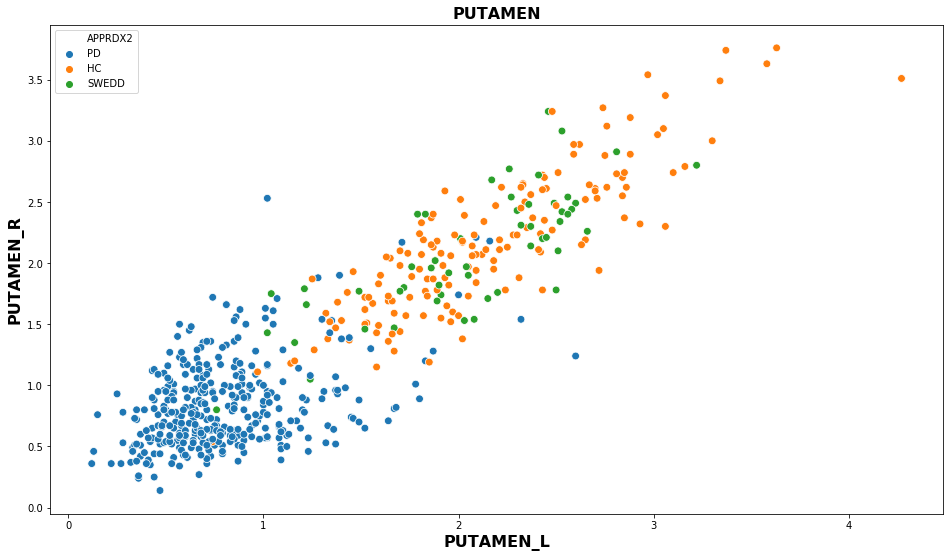

In [27]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='PUTAMEN_L', y='PUTAMEN_R', hue='APPRDX2', data=images_info, s=60)
plt.title('PUTAMEN', fontsize=16,fontweight="bold")
plt.xlabel('PUTAMEN_L',fontweight="bold",fontsize=16)
plt.ylabel('PUTAMEN_R',fontweight="bold",fontsize=16)

Text(0, 0.5, 'CAUDATE_R')

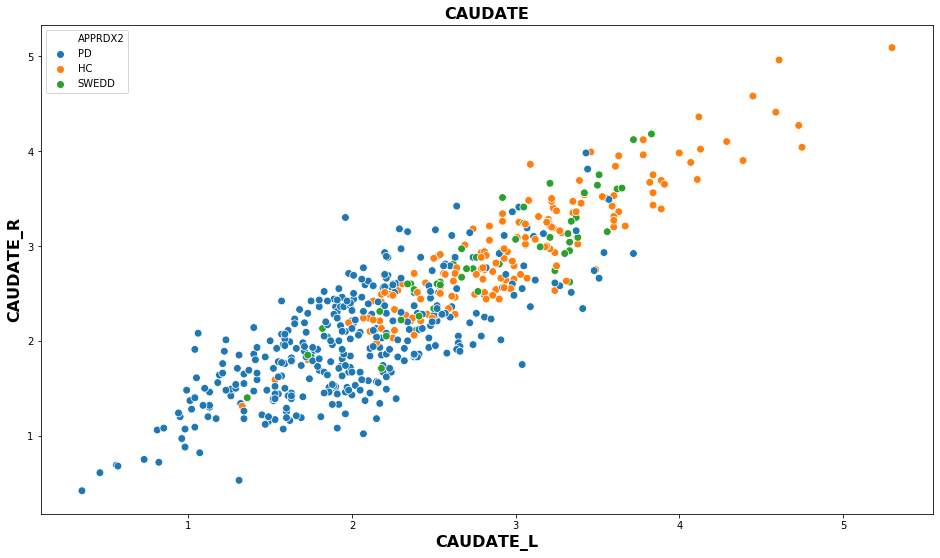

In [28]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='CAUDATE_L', y='CAUDATE_R', hue='APPRDX2', data=images_info, s=60)
plt.title('CAUDATE', fontsize=16,fontweight="bold")
plt.xlabel('CAUDATE_L',fontweight="bold",fontsize=16)
plt.ylabel('CAUDATE_R',fontweight="bold",fontsize=16)

### DATSscan normalized

In [32]:
DATScan_Norm = pd.read_csv("../Imaging/DATScan_Norm.csv")

DATScan_Norm = DATScan_Norm.sort_values(["PATNO","SCAN_DATE"])
DATScan_Norm = DATScan_Norm.groupby('PATNO').first().reset_index()
images_Norm = DATScan_Norm.iloc[:,np.r_[0,3:7]]

datscanPat_Norm = images_Norm[images_Norm["PATNO"].isin(patids)]
datscanPat_Norm = datscanPat_Norm.sort_values("PATNO")
images_info_Norm = datscanPat_Norm.merge(ppmi_info, on=['PATNO'])

status = list()
for i in range(len(images_info_Norm)):
    s = int(images_info_Norm.loc[i,"APPRDX"])
    if s == 1:
        status.append("PD")
    elif s == 2:
        status.append("HC")
    elif s == 3:
        status.append("SWEDD")
    else:
        pat = images_info_Norm.loc[i,"PATNO"]
        print(pat)
        raise Exception 

images_info_Norm["APPRDX2"] = status
images_info_Norm

,PATNO,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L,REC_ID,F_STATUS,EVENT_ID,PAG_NAME,SIGNCNST,...,REFERRAL,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,APPRDX2
0,3001,2.00,1.92,0.255480,-0.146432,274783501,V,CONSENT,SCREEN,1.0,...,60.0,NaN,NaN,NaN,NaN,02/2011,2011-02-10 10:43:30.0,NaN,03/2011,PD
1,3002,2.92,3.72,0.599530,1.165215,278717701,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2011,2011-03-04 11:04:58.0,NaN,03/2011,PD
2,3004,5.09,5.30,2.949289,2.400680,281159801,V,CONSENT,SCREEN,1.0,...,99.0,NaN,NaN,NaN,NaN,03/2011,2011-03-30 11:43:13.0,NaN,03/2011,HC
3,3006,2.28,2.12,0.175997,-2.400680,283722401,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2011,2011-03-31 07:21:03.0,NaN,03/2011,PD
4,3008,3.99,3.46,1.367578,1.463510,289807201,V,CONSENT,SCREEN,1.0,...,4.0,NaN,NaN,NaN,NaN,05/2011,2013-10-31 11:28:09.0,NaN,05/2011,HC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,4125,2.03,2.47,0.391926,1.005487,387339801,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,02/2013,2013-12-10 12:36:00.0,NaN,05/2013,PD
562,4126,1.54,1.88,-0.219232,-1.158726,388354501,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2013,2013-03-27 08:35:42.0,NaN,03/2013,PD
563,4127,2.60,2.34,1.835396,1.571399,391193701,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2013,2013-05-28 06:37:21.0,NaN,03/2013,SWEDD
564,4136,0.68,0.57,-1.406477,-1.922162,388121201,V,CONSENT,SCREEN,1.0,...,99.0,NaN,NaN,NaN,NaN,03/2013,2013-03-06 07:09:02.0,NaN,06/2013,PD


### PLOT CAUDATE and PUTAMEN normalized (using ranknorm funcion in r)

Text(0, 0.5, 'PUTAMEN_R')

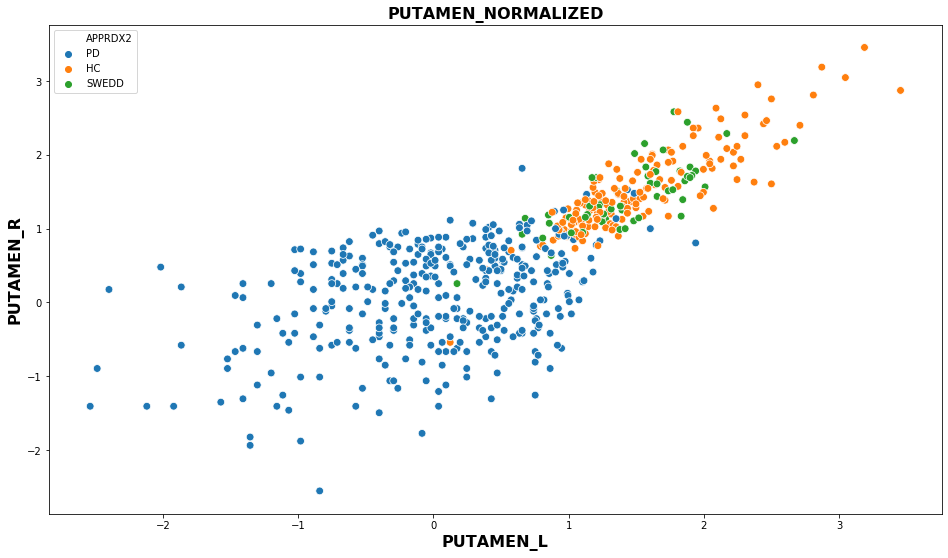

In [39]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='PUTAMEN_L', y='PUTAMEN_R', hue='APPRDX2', data=images_info_Norm, s=60)
plt.title('PUTAMEN_NORMALIZED', fontsize=16,fontweight="bold")
plt.xlabel('PUTAMEN_L',fontweight="bold",fontsize=16)
plt.ylabel('PUTAMEN_R',fontweight="bold",fontsize=16)

Text(0, 0.5, 'CAUDATE_R')

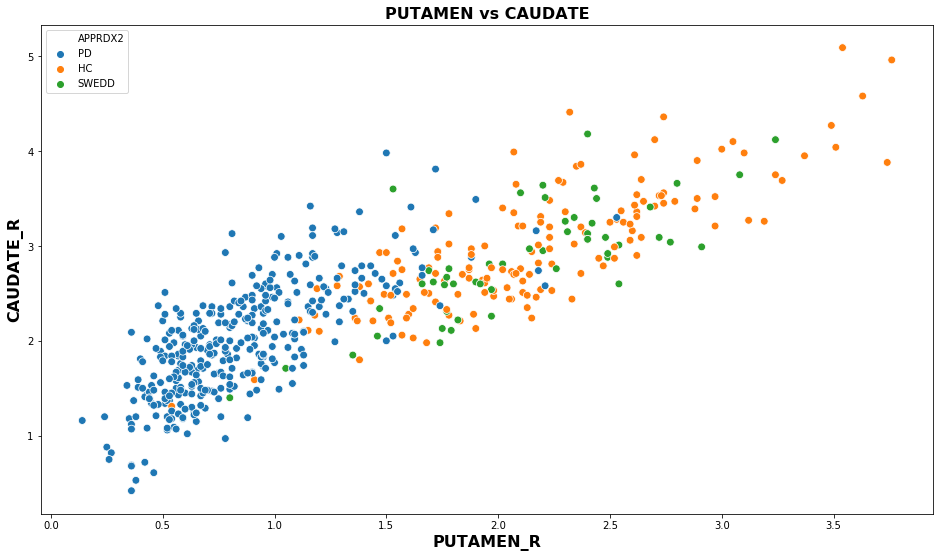

In [40]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='PUTAMEN_R', y='CAUDATE_R', hue='APPRDX2', data=images_info, s=60)
plt.title('PUTAMEN vs CAUDATE (R)', fontsize=16,fontweight="bold")
plt.xlabel('PUTAMEN_R',fontweight="bold",fontsize=16)
plt.ylabel('CAUDATE_R',fontweight="bold",fontsize=16)

Text(0, 0.5, 'CAUDATE_R')

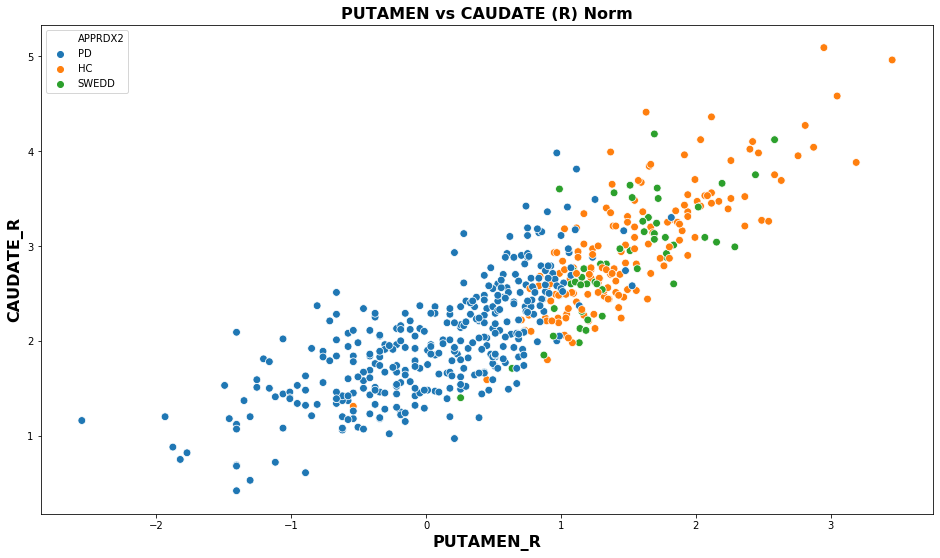

In [42]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='PUTAMEN_R', y='CAUDATE_R', hue='APPRDX2', data=images_info_Norm, s=60)
plt.title('PUTAMEN vs CAUDATE (R) Norm', fontsize=16,fontweight="bold")
plt.xlabel('PUTAMEN_R',fontweight="bold",fontsize=16)
plt.ylabel('CAUDATE_R',fontweight="bold",fontsize=16)

Text(0, 0.5, 'CAUDATE_L')

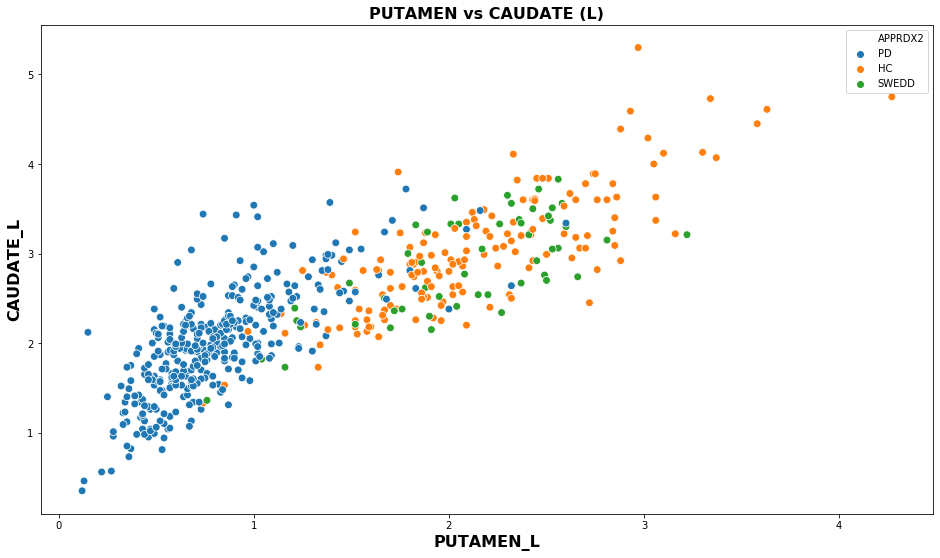

In [43]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='PUTAMEN_L', y='CAUDATE_L', hue='APPRDX2', data=images_info, s=60)
plt.title('PUTAMEN vs CAUDATE (L)', fontsize=16,fontweight="bold")
plt.xlabel('PUTAMEN_L',fontweight="bold",fontsize=16)
plt.ylabel('CAUDATE_L',fontweight="bold",fontsize=16)

Text(0, 0.5, 'CAUDATE_L')

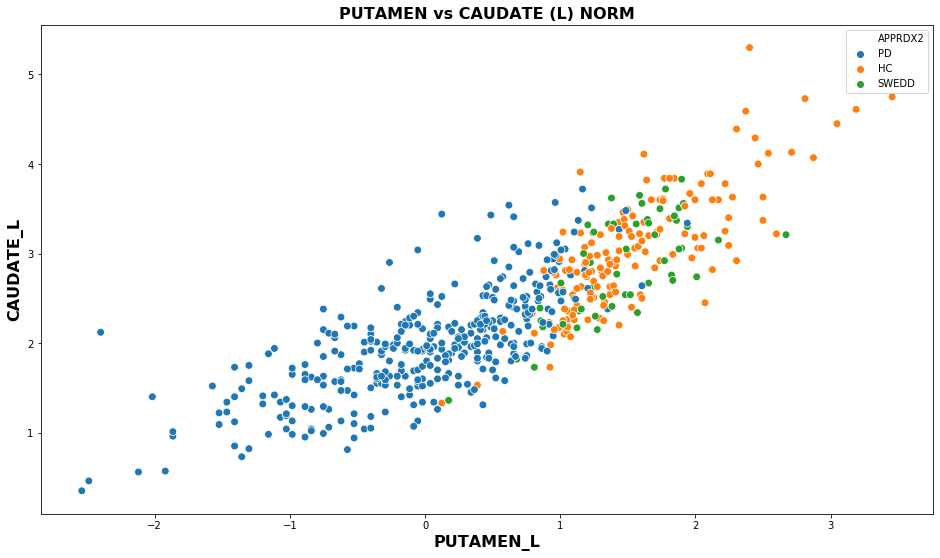

In [44]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='PUTAMEN_L', y='CAUDATE_L', hue='APPRDX2', data=images_info_Norm, s=60)
plt.title('PUTAMEN vs CAUDATE (L) NORM', fontsize=16,fontweight="bold")
plt.xlabel('PUTAMEN_L',fontweight="bold",fontsize=16)
plt.ylabel('CAUDATE_L',fontweight="bold",fontsize=16)

### DATScan Normalized for caudate and putamen (both nomalized)

In [45]:
DATScan_Norm2 = pd.read_csv("../Imaging/DATScan_Norm_complete.csv")

DATScan_Norm2 = DATScan_Norm2.sort_values(["PATNO","SCAN_DATE"])
DATScan_Norm2 = DATScan_Norm2.groupby('PATNO').first().reset_index()
images_Norm2  = DATScan_Norm2.iloc[:,np.r_[0,3:7]]

datscanPat_Norm2  = images_Norm2[images_Norm2["PATNO"].isin(patids)]
datscanPat_Norm2  = datscanPat_Norm2.sort_values("PATNO")
images_info_Norm2 = datscanPat_Norm2.merge(ppmi_info, on=['PATNO'])

status = list()
for i in range(len(images_info_Norm2)):
    s = int(images_info_Norm2.loc[i,"APPRDX"])
    if s == 1:
        status.append("PD")
    elif s == 2:
        status.append("HC")
    elif s == 3:
        status.append("SWEDD")
    else:
        pat = images_info_Norm2.loc[i,"PATNO"]
        print(pat)
        raise Exception 

images_info_Norm2["APPRDX2"] = status
images_info_Norm2

,PATNO,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L,REC_ID,F_STATUS,EVENT_ID,PAG_NAME,SIGNCNST,...,REFERRAL,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,APPRDX2
0,3001,0.216413,0.103146,0.255480,-0.146432,274783501,V,CONSENT,SCREEN,1.0,...,60.0,NaN,NaN,NaN,NaN,02/2011,2011-02-10 10:43:30.0,NaN,03/2011,PD
1,3002,1.287835,2.105413,0.599530,1.165215,278717701,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2011,2011-03-04 11:04:58.0,NaN,03/2011,PD
2,3004,3.455561,3.455561,2.949289,2.400680,281159801,V,CONSENT,SCREEN,1.0,...,99.0,NaN,NaN,NaN,NaN,03/2011,2011-03-30 11:43:13.0,NaN,03/2011,HC
3,3006,0.578573,0.388955,0.175997,-2.400680,283722401,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2011,2011-03-31 07:21:03.0,NaN,03/2011,PD
4,3008,2.400680,1.812159,1.367578,1.463510,289807201,V,CONSENT,SCREEN,1.0,...,4.0,NaN,NaN,NaN,NaN,05/2011,2013-10-31 11:28:09.0,NaN,05/2011,HC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,4125,0.252636,0.811596,0.391926,1.005487,387339801,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,02/2013,2013-12-10 12:36:00.0,NaN,05/2013,PD
562,4126,-0.403846,0.049023,-0.219232,-1.158726,388354501,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2013,2013-03-27 08:35:42.0,NaN,03/2013,PD
563,4127,0.929012,0.671641,1.835396,1.571399,391193701,V,CONSENT,SCREEN,1.0,...,1.0,NaN,NaN,NaN,NaN,03/2013,2013-05-28 06:37:21.0,NaN,03/2013,SWEDD
564,4136,-2.013693,-2.188055,-1.406477,-1.922162,388121201,V,CONSENT,SCREEN,1.0,...,99.0,NaN,NaN,NaN,NaN,03/2013,2013-03-06 07:09:02.0,NaN,06/2013,PD


Text(0, 0.5, 'CAUDATE_R')

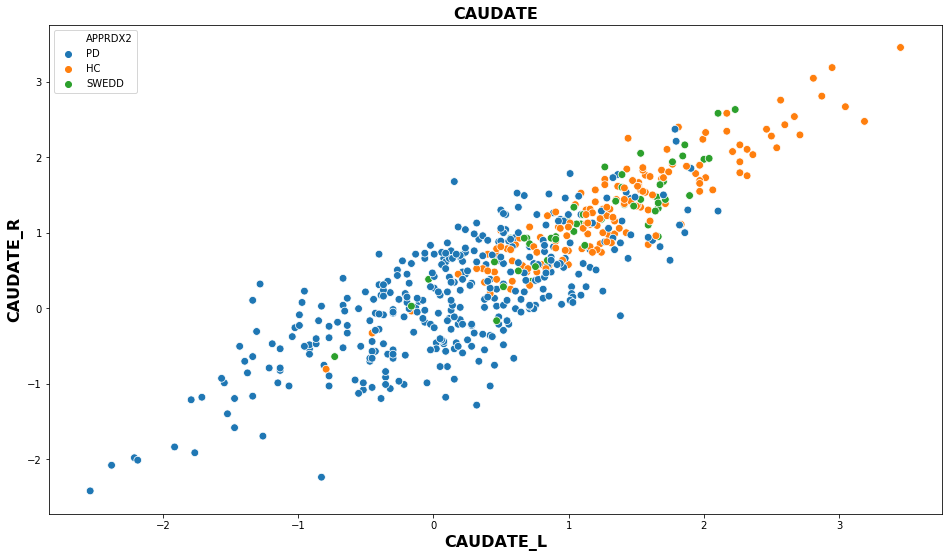

In [47]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='CAUDATE_L', y='CAUDATE_R', hue='APPRDX2', data=images_info_Norm2, s=60)
plt.title('CAUDATE', fontsize=16,fontweight="bold")
plt.xlabel('CAUDATE_L',fontweight="bold",fontsize=16)
plt.ylabel('CAUDATE_R',fontweight="bold",fontsize=16)

### PLOT CAUDATE and PUTAMEN both normalized (using ranknorm funcion in r)

Text(0, 0.5, 'CAUDATE_R')

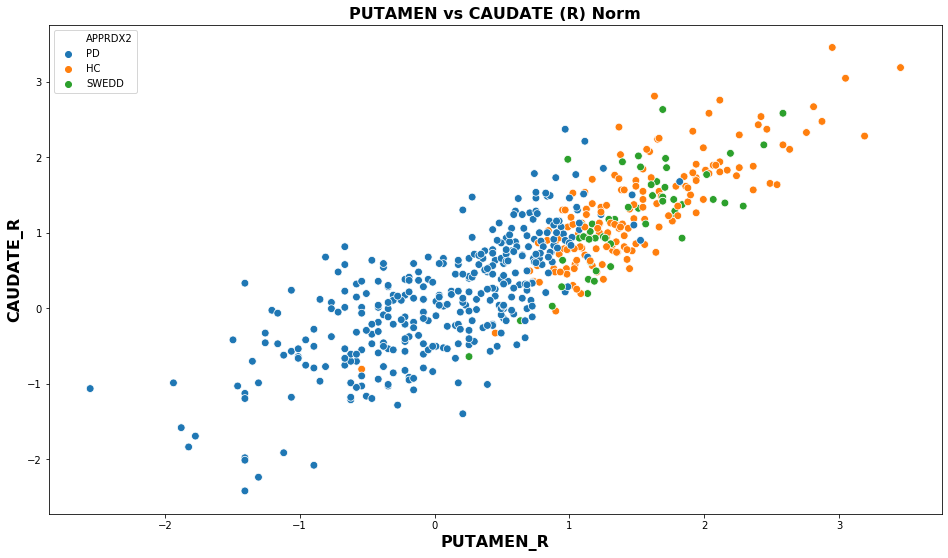

In [51]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='PUTAMEN_R', y='CAUDATE_R', hue='APPRDX2', data=images_info_Norm2, s=60)
plt.title('PUTAMEN vs CAUDATE (R) Norm', fontsize=16,fontweight="bold")
plt.xlabel('PUTAMEN_R',fontweight="bold",fontsize=16)
plt.ylabel('CAUDATE_R',fontweight="bold",fontsize=16)

### Distribution of Caudate_L and Putamen_L at initial condition (all patients)

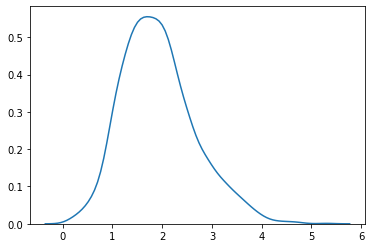

In [56]:
sns.distplot(DATScan["CAUDATE_L"].tolist(),hist=False)

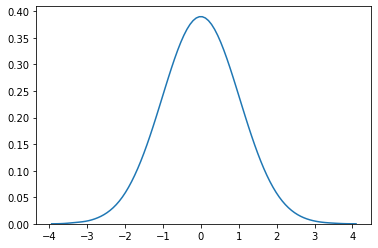

In [54]:
sns.distplot(DATScan["PUTAMEN_L"].tolist(),hist=False)

### Distribution of Caudate_L and Putamen_L after filtering considering only our patients

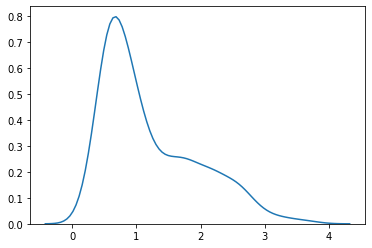

In [59]:
sns.distplot(images["PUTAMEN_R"].tolist(),hist=False)

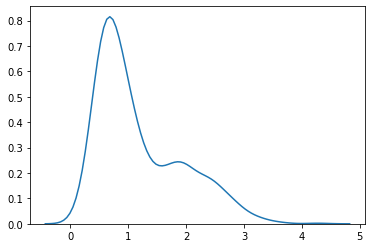

In [60]:
sns.distplot(images["PUTAMEN_L"].tolist(),hist=False)

In [63]:
# calculating age from the date of birth
age = list()

for i in range(len(images_info)):
    mm,yy = images_info.loc[i,"SITE_APRV"].split("/")
    a = int(yy) - int(images_info.loc[i,"BIRTHDT"])
    age.append(a)

images_info["AGE"] = age   

Text(0, 0.5, 'CAUDATE_R')

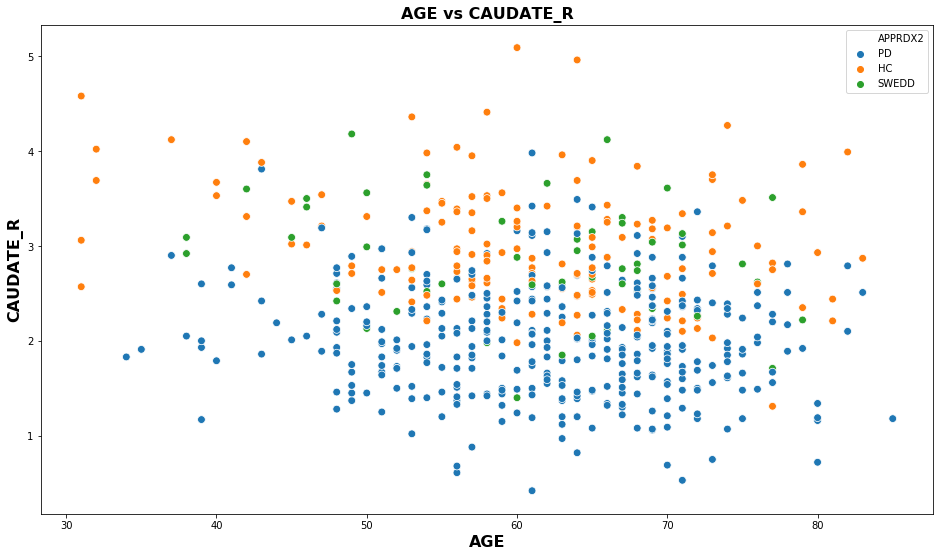

In [65]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='AGE', y='CAUDATE_R', hue='APPRDX2', data=images_info, s=60)
plt.title('AGE vs CAUDATE_R', fontsize=16,fontweight="bold")
plt.xlabel('AGE',fontweight="bold",fontsize=16)
plt.ylabel('CAUDATE_R',fontweight="bold",fontsize=16)

Text(0, 0.5, 'PUTAMEN_R')

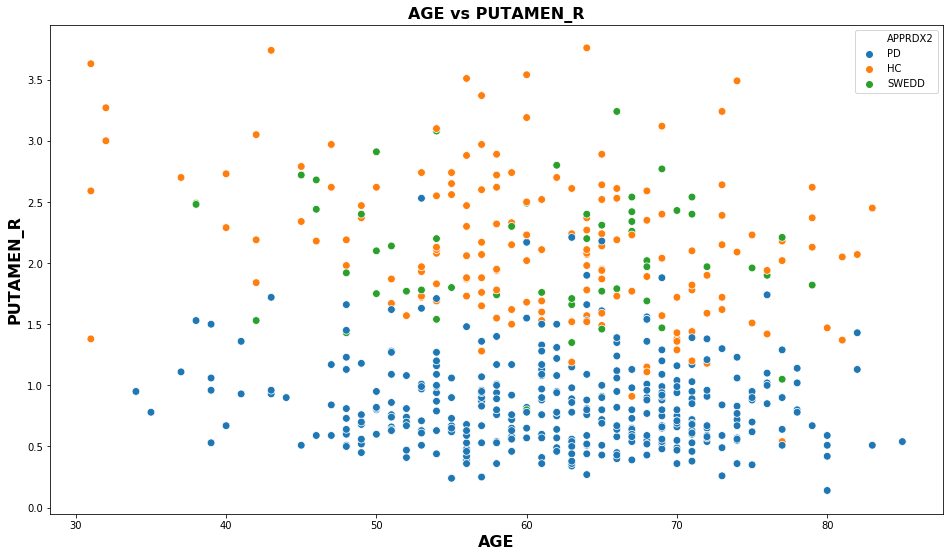

In [68]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='AGE', y='PUTAMEN_R', hue='APPRDX2', data=images_info, s=60)
plt.title('AGE vs PUTAMEN_R', fontsize=16,fontweight="bold")
plt.xlabel('AGE',fontweight="bold",fontsize=16)
plt.ylabel('PUTAMEN_R',fontweight="bold",fontsize=16)

## PLOT USING MRI DATA

In [69]:
MRI = pd.read_csv("../Processed_Images/PPMIMERGE_20200419.csv")
MRI_unique = MRI.groupby('PATNO').first().reset_index()
MRI_unique

/Users/guglielmo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (31,494,496,506,508,510,512,542,543,550,551,553,561,563,564) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PATNO,index,APPRDX_enrol,APPRDX_current,EVENT_ID,Age,Years_bl,GENDER,FAMHXPD_N1stDegree,FAMHXPD_N2ndDegree,...,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,TD_score,PIGD_score,TD_PIGD_ratio,TD_PIGD_class,INFODT_,INFODT_bl
0,3000,651,2.0,2.0,BL,69.169,0.0,1.0,0.0,0.0,...,628301.286475,9.996803e+05,9.777723e+05,973296.0,0.000000,0.0,NaN,Indeterminate,2011-02-01,2011-02-01
1,3001,687,1.0,1.0,BL,65.161,NaN,2.0,0.0,0.0,...,668025.901257,1.138365e+06,1.094811e+06,1092459.0,0.272727,0.0,5.000000,TD,2011-03-01,NaN
2,3002,759,1.0,1.0,BL,67.581,NaN,1.0,0.0,0.0,...,585538.400359,9.026203e+05,8.838913e+05,881444.0,0.181818,0.6,0.303030,PIGD,2011-03-01,NaN
3,3003,831,1.0,1.0,BL,56.750,0.0,1.0,0.0,0.0,...,636432.509323,1.040302e+06,1.020943e+06,1019030.0,0.363636,0.4,0.909091,Indeterminate,2011-04-01,2011-04-01
4,3004,867,2.0,2.0,BL,59.414,0.0,2.0,0.0,0.0,...,640446.950904,1.074093e+06,1.056334e+06,1053446.0,0.000000,0.0,NaN,Indeterminate,2011-04-01,2011-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,90456,69726,4.0,4.0,BL,82.505,0.0,2.0,0.0,0.0,...,635113.067329,1.123903e+06,1.030924e+06,1027319.0,0.090909,0.6,0.151515,PIGD,2013-09-01,2013-09-01
1907,91097,69762,4.0,4.0,BL,67.335,0.0,2.0,0.0,0.0,...,507261.673333,8.354743e+05,8.187873e+05,816977.0,0.000000,0.4,0.000000,PIGD,2014-07-01,2014-07-01
1908,91837,69798,4.0,4.0,BL,73.914,0.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,Indeterminate,2014-03-01,2014-03-01
1909,92490,69834,4.0,4.0,BL,72.504,0.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.090909,0.0,0.000000,TD,2015-01-01,2015-01-01


In [70]:
MRIPat = MRI_unique[MRI_unique["PATNO"].isin(patids)]
MRIPat = MRIPat.sort_values("PATNO")
MRIPat

,PATNO,index,APPRDX_enrol,APPRDX_current,EVENT_ID,Age,Years_bl,GENDER,FAMHXPD_N1stDegree,FAMHXPD_N2ndDegree,...,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,TD_score,PIGD_score,TD_PIGD_ratio,TD_PIGD_class,INFODT_,INFODT_bl
1,3001,687,1.0,1.0,BL,65.161,NaN,2.0,0.0,0.0,...,668025.901257,1.138365e+06,1.094811e+06,1092459.0,0.272727,0.0,5.000000,TD,2011-03-01,NaN
2,3002,759,1.0,1.0,BL,67.581,NaN,1.0,0.0,0.0,...,585538.400359,9.026203e+05,8.838913e+05,881444.0,0.181818,0.6,0.303030,PIGD,2011-03-01,NaN
4,3004,867,2.0,2.0,BL,59.414,0.0,2.0,0.0,0.0,...,640446.950904,1.074093e+06,1.056334e+06,1053446.0,0.000000,0.0,NaN,Indeterminate,2011-04-01,2011-04-01
5,3006,903,1.0,1.0,BL,57.498,0.0,1.0,0.0,0.0,...,691787.053845,1.120597e+06,1.091968e+06,1089715.0,0.090909,0.2,0.454545,PIGD,2011-04-01,2011-04-01
7,3008,975,2.0,2.0,BL,81.916,0.0,1.0,0.0,0.0,...,522266.506289,7.901650e+05,7.530110e+05,749890.0,0.000000,0.2,0.000000,PIGD,2011-06-01,2011-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,4125,32734,1.0,1.0,BL,64.000,NaN,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1.000000,0.0,1.136364,TD,2013-04-01,NaN
678,4126,32842,1.0,1.0,BL,55.666,NaN,2.0,1.0,0.0,...,695806.656485,1.145848e+06,1.115972e+06,1113066.0,0.545455,0.2,2.727273,TD,2013-03-01,NaN
679,4127,32914,3.0,3.0,BL,67.086,0.0,2.0,0.0,1.0,...,568639.007992,8.759602e+05,8.617642e+05,860686.0,0.636364,0.0,2.272727,TD,2013-04-01,2013-04-01
681,4136,34390,1.0,1.0,BL,55.748,0.0,2.0,0.0,0.0,...,695968.316289,1.078311e+06,1.053845e+06,1051472.0,0.181818,0.6,0.303030,PIGD,2013-03-01,2013-03-01


In [72]:
images_info_MRI = MRIPat.merge(ppmi_info, on=['PATNO'])
images_info_MRI

,PATNO,index,APPRDX_enrol,APPRDX_current,EVENT_ID_x,Age,Years_bl,GENDER_x,FAMHXPD_N1stDegree,FAMHXPD_N2ndDegree,...,PRJENRDT,REFERRAL,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,3001,687,1.0,1.0,BL,65.161,NaN,2.0,0.0,0.0,...,03/2011,60.0,NaN,NaN,NaN,NaN,02/2011,2011-02-10 10:43:30.0,NaN,03/2011
1,3002,759,1.0,1.0,BL,67.581,NaN,1.0,0.0,0.0,...,03/2011,1.0,NaN,NaN,NaN,NaN,03/2011,2011-03-04 11:04:58.0,NaN,03/2011
2,3004,867,2.0,2.0,BL,59.414,0.0,2.0,0.0,0.0,...,04/2011,99.0,NaN,NaN,NaN,NaN,03/2011,2011-03-30 11:43:13.0,NaN,03/2011
3,3006,903,1.0,1.0,BL,57.498,0.0,1.0,0.0,0.0,...,04/2011,1.0,NaN,NaN,NaN,NaN,03/2011,2011-03-31 07:21:03.0,NaN,03/2011
4,3008,975,2.0,2.0,BL,81.916,0.0,1.0,0.0,0.0,...,06/2011,4.0,NaN,NaN,NaN,NaN,05/2011,2013-10-31 11:28:09.0,NaN,05/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,4125,32734,1.0,1.0,BL,64.000,NaN,2.0,0.0,0.0,...,03/2013,1.0,NaN,NaN,NaN,NaN,02/2013,2013-12-10 12:36:00.0,NaN,05/2013
562,4126,32842,1.0,1.0,BL,55.666,NaN,2.0,1.0,0.0,...,03/2013,1.0,NaN,NaN,NaN,NaN,03/2013,2013-03-27 08:35:42.0,NaN,03/2013
563,4127,32914,3.0,3.0,BL,67.086,0.0,2.0,0.0,1.0,...,04/2013,1.0,NaN,NaN,NaN,NaN,03/2013,2013-05-28 06:37:21.0,NaN,03/2013
564,4136,34390,1.0,1.0,BL,55.748,0.0,2.0,0.0,0.0,...,02/2013,99.0,NaN,NaN,NaN,NaN,03/2013,2013-03-06 07:09:02.0,NaN,06/2013


In [75]:
status = list()
for i in range(len(images_info_MRI)):
    s = int(images_info_MRI.loc[i,"APPRDX"])
    if s == 1:
        status.append("PD")
    elif s == 2:
        status.append("HC")
    elif s == 3:
        status.append("SWEDD")
    else:
        pat = images_info_MRI.loc[i,"PATNO"]
        print(pat)
        raise Exception 

images_info_MRI["APPRDX2"] = status

### PLOT using some MRI features

Text(0, 0.5, 'lh_parahippocampal_area')

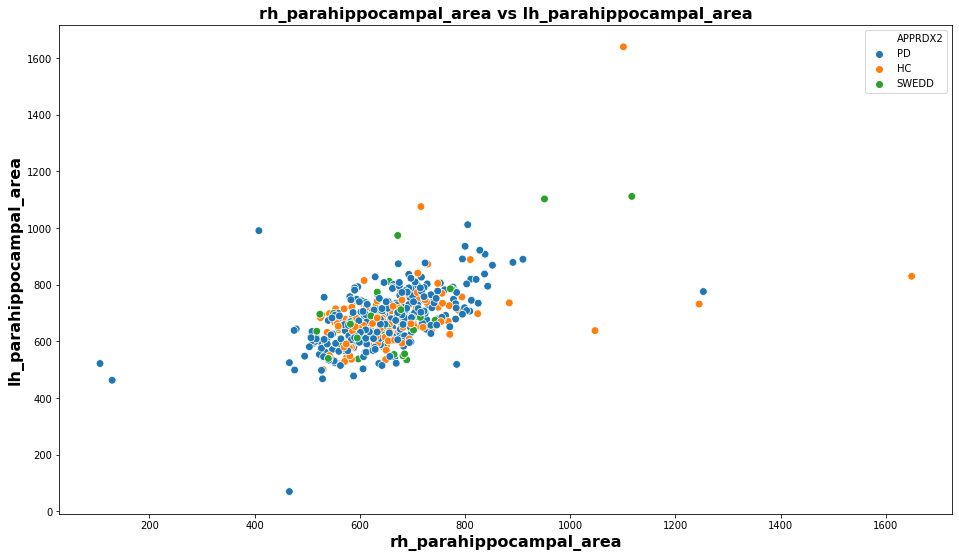

In [76]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='rh_parahippocampal_area', y='lh_parahippocampal_area',
                hue='APPRDX2', data=images_info_MRI, s=60)
plt.title('rh_parahippocampal_area vs lh_parahippocampal_area', fontsize=16,fontweight="bold")
plt.xlabel('rh_parahippocampal_area',fontweight="bold",fontsize=16)
plt.ylabel('lh_parahippocampal_area',fontweight="bold",fontsize=16)

Text(0, 0.5, 'lh_parahippocampal_volume')

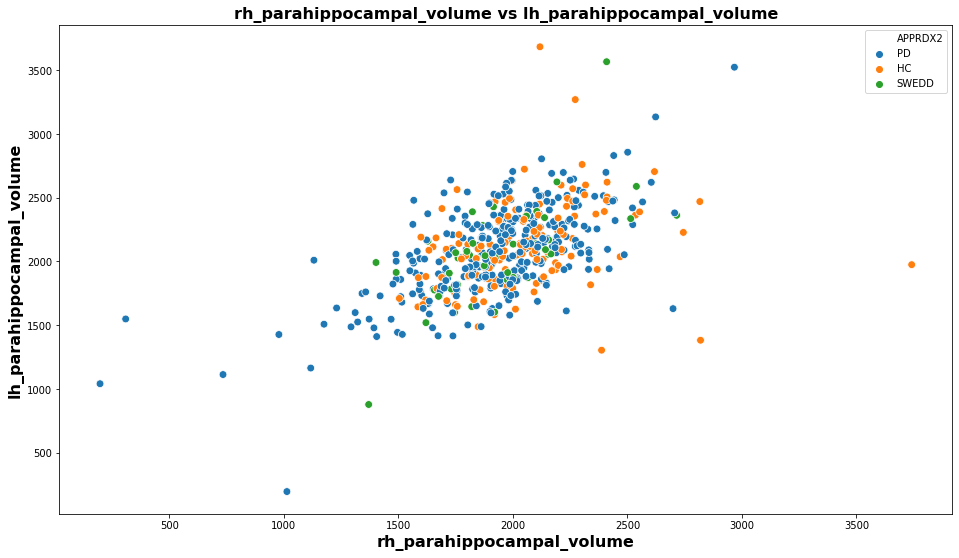

In [77]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='rh_parahippocampal_volume', y='lh_parahippocampal_volume',
                hue='APPRDX2', data=images_info_MRI, s=60)
plt.title('rh_parahippocampal_volume vs lh_parahippocampal_volume', fontsize=16,fontweight="bold")
plt.xlabel('rh_parahippocampal_volume',fontweight="bold",fontsize=16)
plt.ylabel('lh_parahippocampal_volume',fontweight="bold",fontsize=16)

### List of all MRI features

In [79]:
for i in images_info_MRI.columns:
    print(i)

PATNO
index
APPRDX_enrol
APPRDX_current
EVENT_ID_x
Age
Years_bl
GENDER_x
FAMHXPD_N1stDegree
FAMHXPD_N2ndDegree
ENROLLDT
CONSNTDT_x
GENECAT
MUTRSLT
LRRKCD
BIRTHDT_x
HISPLAT_x
RAINDALS_x
RAASIAN_x
RABLACK_x
RAHAWOPI_x
RAWHITE_x
RANOS_x
Years_since_DX_bl
EDUCYRS
HANDED
INFODT
PDMEDYN
ONLDOPA
ONDOPAG
ONOTHER
INFODT_CLINDX
PRIMDIAG
DCRTREM
DCRIGID
DCBRADY
INFODT_VITAL
WGTKG
HTCM
TEMPC
SYSSUP
DIASUP
HRSUP
SYSSTND
DIASTND
HRSTND
INFODT_BIOANALYS
PDMEDYN_BIOANALYS
2,2' di-22:6-BMP
3,4-Dihydroxymandelic acid
3,4-Dihydroxyphenylacetic acid (DOPAC)
3,4-Dihydroxyphenylalanine (DOPA)
3,4-Dihydroxyphenylglycol (DOPEG)
3-Methoxytyrosine
3-O-Methyldopamine
4-Hydroxy-3-methoxymandelic acid
4-Hydroxy-3-methoxyphenylglycol (HMPG)
5-Hydroxy-3-indoleacetic acid (5-HIAA)
ABeta 1-42
Adrenaline (Epinephrine)
Apolipoprotein A1
C16 Cer
C16 GL2
C16 GlcCer
C16 SM
C18 Cer
C18 GL2
C18 GlcCer
C18 SM
C20 Cer
C20 GL2
C20 GlcCer
C20 SM
C22 Cer
C22 GL2
C22 GlcCer
C22 SM
C23 Cer
C23 GL2
C23 GlcCer
C23 SM
C24 Cer
C24 GL2


Text(0, 0.5, 'lh_middletemporal_volume')

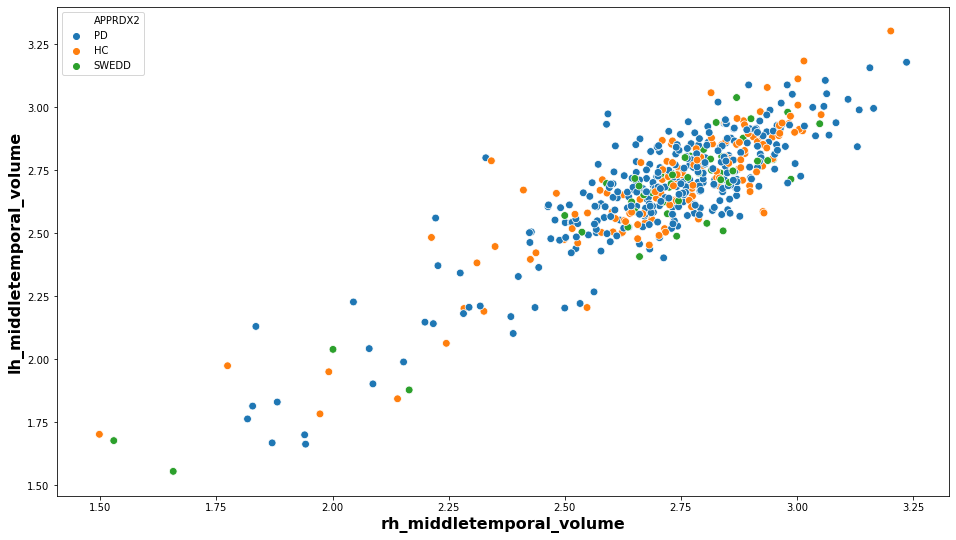

In [82]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='rh_middletemporal_thickness', y='lh_middletemporal_thickness',
                hue='APPRDX2', data=images_info_MRI, s=60)
plt.xlabel('rh_middletemporal_volume',fontweight="bold",fontsize=16)
plt.ylabel('lh_middletemporal_volume',fontweight="bold",fontsize=16)